In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

drivers = pd.read_csv('Datasets/drivers_dataset.csv', delimiter='\t',
header=0, names=['Driver_ID', 'Distance_Feature', 'Speeding_Feature'])

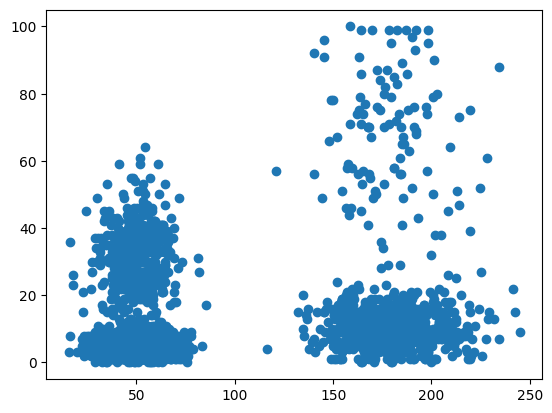

In [10]:
## 4.1.
## A. Load the drivers dataset 'datasets/drivers_dataset.csv'
## B. Visualize the data
plt.scatter(drivers['Distance_Feature'], drivers['Speeding_Feature'])

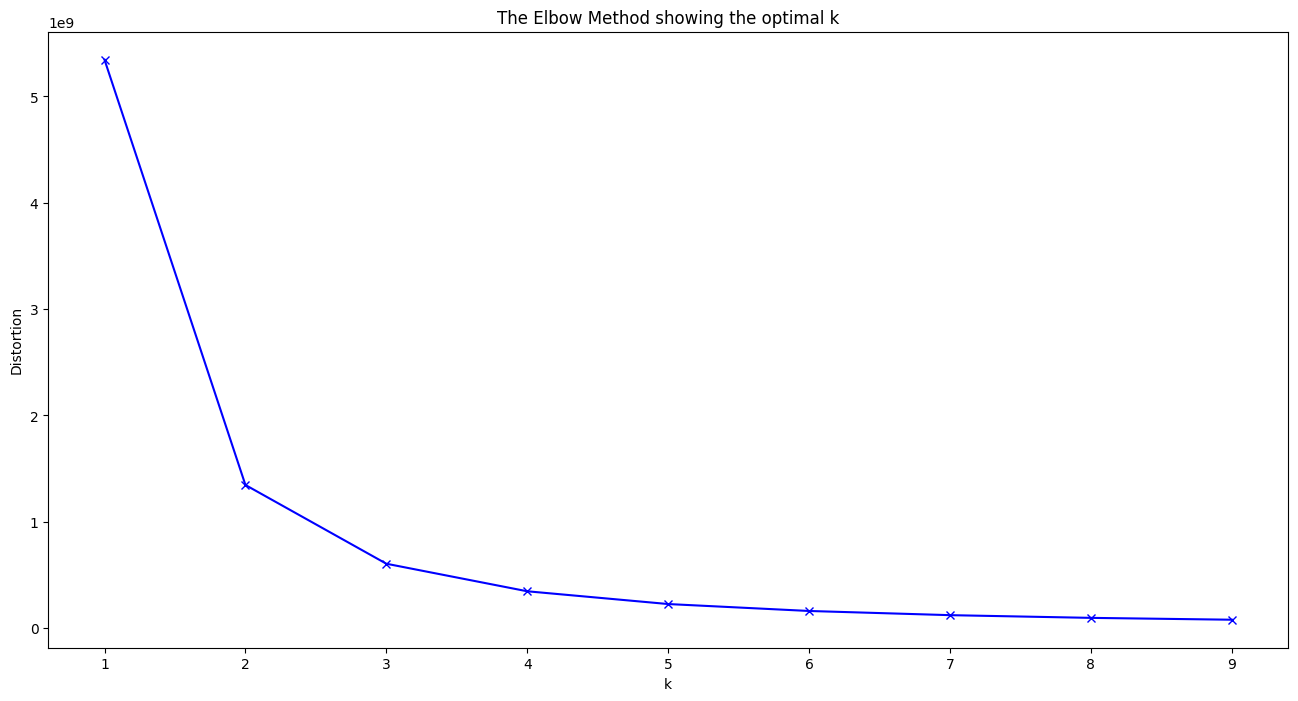

In [11]:
## C. Apply K-Means with choosing the number of clusters using the elbow method.
from sklearn.cluster import KMeans
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(drivers)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

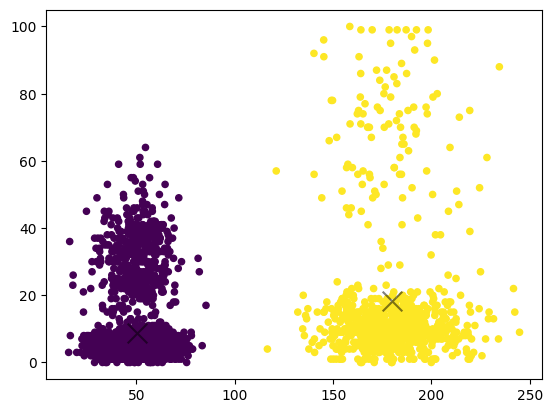

In [12]:
## 2 and 3 clusters
k_means_two = KMeans(n_clusters=2)
k_means_two.fit(drivers[['Distance_Feature', 'Speeding_Feature']])
y_k_means_two = k_means_two.predict(drivers[['Distance_Feature', 'Speeding_Feature']])
plt.scatter(drivers['Distance_Feature'], drivers['Speeding_Feature'], c=y_k_means_two, s=20, cmap='viridis')
# plot the centroids
centers = k_means_two.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='x');

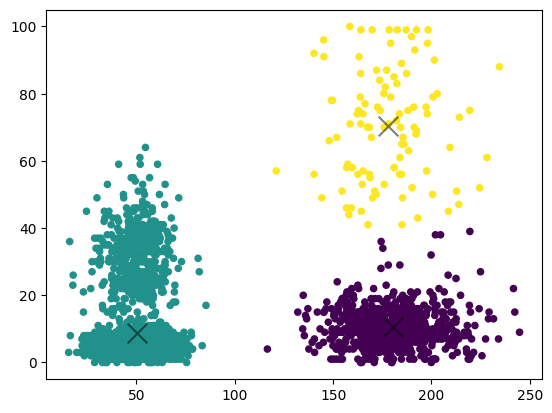

In [13]:
k_means_three = KMeans(n_clusters=3)
k_means_three.fit(drivers[['Distance_Feature', 'Speeding_Feature']])
y_k_means_three = k_means_three.predict(drivers[['Distance_Feature', 'Speeding_Feature']])
plt.scatter(drivers['Distance_Feature'], drivers['Speeding_Feature'], c=y_k_means_three, s=20, cmap='viridis')
# plot the centroids
centers = k_means_three.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='x');

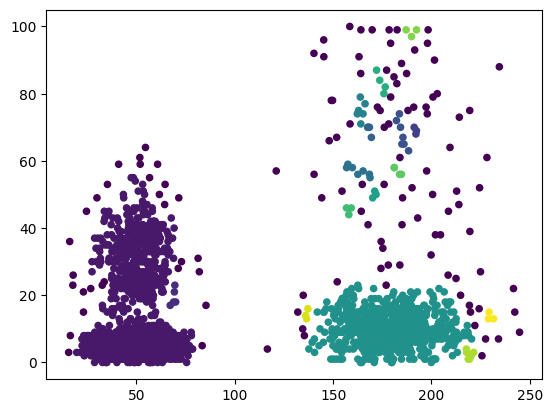

In [24]:
## D. Apply DBSCAN and Agglomerative Clustering with the same number of clusters as in A.
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(drivers[['Distance_Feature', 'Speeding_Feature']])
distances, indices = nbrs.kneighbors(drivers[['Distance_Feature', 'Speeding_Feature']])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
# plt.plot(distances)

dbscan = DBSCAN(eps=3.5, min_samples=3)
dbscan.fit(drivers[['Distance_Feature', 'Speeding_Feature']])
y_dbscan = dbscan.fit_predict(drivers[['Distance_Feature', 'Speeding_Feature']])
plt.scatter(drivers['Distance_Feature'], drivers['Speeding_Feature'], c=y_dbscan, s=20, cmap='viridis')

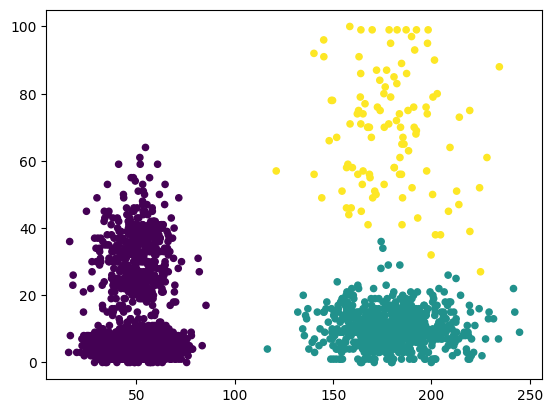

In [26]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(drivers[['Distance_Feature', 'Speeding_Feature']])
y_agg = agg.fit_predict(drivers[['Distance_Feature', 'Speeding_Feature']])
plt.scatter(drivers['Distance_Feature'], drivers['Speeding_Feature'], c=y_agg, s=20, cmap='viridis')


In [27]:
## E. Compare the results of A, B and C using the silhouette score.
from sklearn.metrics import silhouette_score

print('K-Means: ', silhouette_score(drivers[['Distance_Feature', 'Speeding_Feature']], y_k_means_three))
print('DBSCAN: ', silhouette_score(drivers[['Distance_Feature', 'Speeding_Feature']], y_dbscan))
print('Agglomerative Clustering: ', silhouette_score(drivers[['Distance_Feature', 'Speeding_Feature']], y_agg))

K-Means:  0.8231396834167266
DBSCAN:  0.26833914252972546
Agglomerative Clustering:  0.8216555622432279


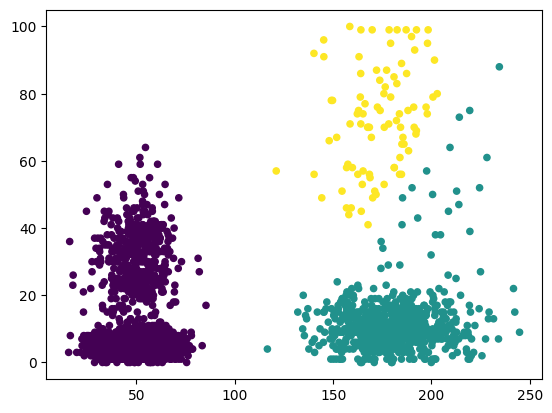

In [33]:
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
## 4.2.
## A. Optimize the parameters of DBSCAN for the concave dataset using the silhouette score and plot the results
## B. Go to the [Clustering Gallery](https://scikit-learn.org/stable/modules/clustering.html) and try to find a clustering algorithm that can perform better than DBSCAN on this dataset
birch = cluster.Birch(n_clusters=3)
birch.fit(drivers[['Distance_Feature', 'Speeding_Feature']])
sp_pred = birch.fit_predict(drivers[['Distance_Feature', 'Speeding_Feature']])
plt.scatter(drivers['Distance_Feature'], drivers['Speeding_Feature'], c=sp_pred, s=20, cmap='viridis')

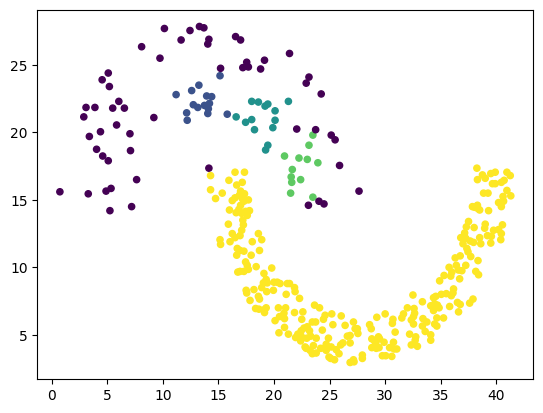

In [35]:
df_concave_data = pd.read_csv('Datasets/concave_dataset.txt', delimiter='\t', header=0, names=['x', 'y', 'class'])

dbscan = DBSCAN(eps=2.0, min_samples=8)
dbscan.fit(df_concave_data[['x', 'y']])
y_dbscan = dbscan.fit_predict(df_concave_data[['x', 'y']])
plt.scatter(df_concave_data['x'], df_concave_data['y'], c=y_dbscan, s=20, cmap='viridis')

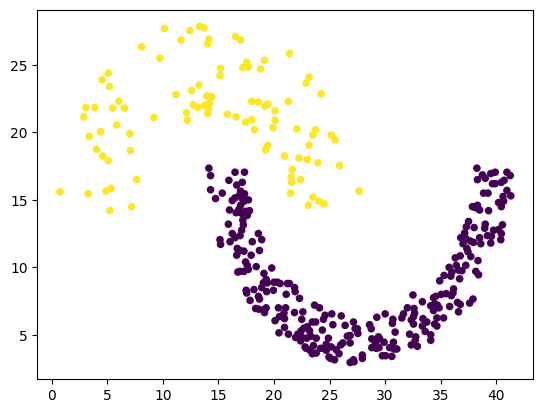

In [37]:
spectral = cluster.SpectralClustering(
        n_clusters=2,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
spectral.fit(df_concave_data[['x', 'y']])
y_spectral = spectral.fit_predict(df_concave_data[['x', 'y']])
plt.scatter(df_concave_data['x'], df_concave_data['y'], c=y_spectral, s=20, cmap='viridis')